In [1]:
import keras
import pickle
import os
import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from build_database import build_database

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

Using TensorFlow backend.


In [2]:
#cargamos el modelo a utilizar
base_model = VGG19(weights='imagenet') # media de carga de 40s para VGG19 y media de carga de 145s para resnet50

In [3]:
#Seleccionamos la capa del modelo
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

In [4]:
#Funcio que indica les capes q te el modelo
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
#Diccionario de todos los parametros de la base - unificamos datos para su posterior utilizacion
params = get_params() # se queda la información de los directorios

In [6]:
params['split'] = 'val'
readfile = os.path.join(params['root'],params['root_save'], params['image_lists'],params['split'] + '.txt')  #Coje el txt del val y lo lee

In [7]:
readfile

'./save/image_lists/val.txt'

In [8]:
#Cargamos todos los nombres de las imagenes
with open(readfile,'r') as f:
        image_list = f.readlines()

In [9]:
image_list.sort()

In [10]:
#Creacion lista con los paths de las fotos 
lista = []
for image_name in image_list:

        # Read image
        lista.append(os.path.join(params['root'],params['database'],
                                     params['split'],
                                     'images',image_name.rstrip()))

In [11]:
#Cargamos todas las imagenes
i=0
imagen = [] #Todas las imagenes de val redimensionadas
final = [] #Todas las imagenes de val en matriz y preprocesas
for i in range(len(image_list)):   
    imagen.append(image.load_img(lista[i], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final.append(image.img_to_array(imagen[i]))
    final[i] = np.expand_dims(final[i], axis=0)
    final[i] = preprocess_input(final[i])

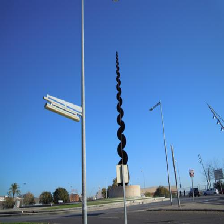

In [12]:
imagen[1]

In [13]:
#Usamos la lista Final y obtenemos el vector salida con los descriptores de las imagenes de val
salida = []
k = 0
for k in range(len(image_list)):
    salida.append(model.predict(final[k]))


In [14]:
params['splitt'] = 'test'
readfile2 = os.path.join(params['root'],params['root_save'], params['image_lists'],params['splitt'] + '.txt') 

In [15]:
with open(readfile2,'r') as f2:
    image_list2 = f2.readlines()

In [16]:
image_list2.sort()

In [17]:
lista2 = []
for image_name2 in image_list2:
    lista2.append(os.path.join(params['root'],params['database'],
                                     params['splitt'],
                                     'images',image_name2.rstrip()))

In [18]:
i2=0
imagen2 = []
final2 = []
for i2 in range(len(image_list2)):   
    imagen2.append(image.load_img(lista2[i2], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final2.append(image.img_to_array(imagen2[i2]))
    final2[i2] = np.expand_dims(final2[i2], axis=0)
    final2[i2] = preprocess_input(final2[i2])

In [19]:
salida2 = []
k2 = 0
for k2 in range(len(image_list2)):
    salida2.append(model.predict(final2[k2]))


In [20]:
params['splittr'] = 'train'
readfile3 = os.path.join(params['root'],params['root_save'], params['image_lists'],params['splittr'] + '.txt')

In [21]:
with open(readfile3,'r') as f3:
    image_list3 = f3.readlines()

In [22]:
image_list3.sort()

In [23]:
lista3 = []
for image_name3 in image_list3:
    lista3.append(os.path.join(params['root'],params['database'],
                                     params['splittr'],
                                     'images',image_name3.rstrip()))

In [24]:
i3=0
imagen3 = []
final3 = []
for i3 in range(len(image_list3)):   
    imagen3.append(image.load_img(lista3[i3], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final3.append(image.img_to_array(imagen3[i3]))
    
    final3[i3] = np.expand_dims(final3[i3], axis=0)
    final3[i3] = preprocess_input(final3[i3])

In [25]:
salida3 = []
k3 = 0
for k3 in range(len(image_list3)):
    salida3.append(model.predict(final3[k3]))

In [26]:
#Cambiamos de lista a matriz 1xN
descriptor = np.asarray(salida)

In [35]:
descriptor.shape

(477, 1, 4096)

In [27]:
descriptor2 = np.asarray(salida2)

In [28]:
descriptor3 = np.asarray(salida3)

In [29]:
pickle.dump(descriptor, open("descriptor.p", "wb"))

In [30]:
pickle.dump(descriptor2, open("descriptor2.p", "wb"))

In [31]:
pickle.dump(descriptor3, open("descriptor3.p", "wb"))

In [32]:
pickle.dump(imagen, open("imagen.p", "wb"))

In [33]:
pickle.dump(imagen2, open("imagen2.p", "wb"))

In [34]:
pickle.dump(imagen3, open("imagen3.p", "wb"))